# Quantum Computing Midterm Exam

## Problems 3, 4, 5

Problems 3, 4, and 5 from the midterm are to be completed in this notebook and uploaded to Canvas.

Make sure you draw your circuits and execute your cells!

### Installations and Imports

In [97]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [98]:
#Let's go ahead and import all this stuff too
#I know some of these are redundant. It makes the typing easier.
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram

In [99]:
from datetime import date, datetime
print(datetime.now())

2024-10-10 16:58:11.524241


Not as effective with digital tests or when we don't all take the test together in person

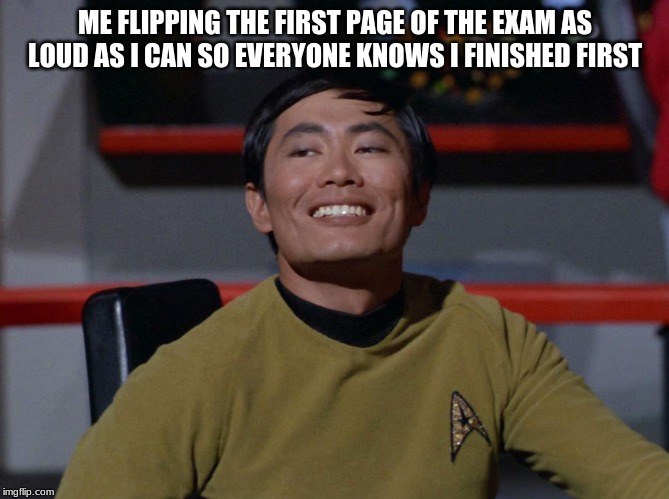

Answering all of question 2 like

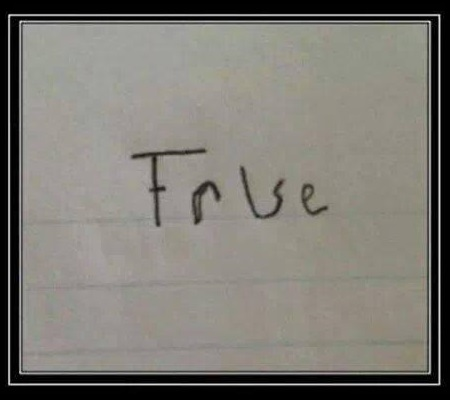

# Problem 3

The quantum oracle
$$\begin{equation*}
\mathbf{U}_g = \mathbf{C}_{10} \mathbf{X}_0
\end{equation*}$$

implements the 1-bit Boolean function $g(x) = 1-x$.  In other words,

$$\begin{equation*}
\mathbf{U}_g \lvert x\rangle \lvert y\rangle = \lvert x\rangle \lvert y \oplus (1-x)\rangle
\end{equation*}
$$

(a) Write a function to implement $\mathbf{U}_g$.

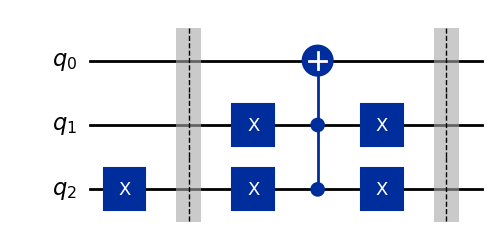

In [100]:
def U_g(qc):
    # we're controlling on the first qubit, targetting zero
    qc.x(2)
    qc.barrier()
    qc.x(2)
    qc.x(1)
    qc.ccx(2,1,0)
    qc.x(2)
    qc.x(1)
    qc.barrier()

    



    ## between these comments
    return qc
N= 2
Ug = U_g(QuantumCircuit(N+1))
Ug.draw('mpl')

(b) Using your function, implement Deutsch's algorithm for $\mathbf{U}_g$. Use Qiskit to draw the circuit.

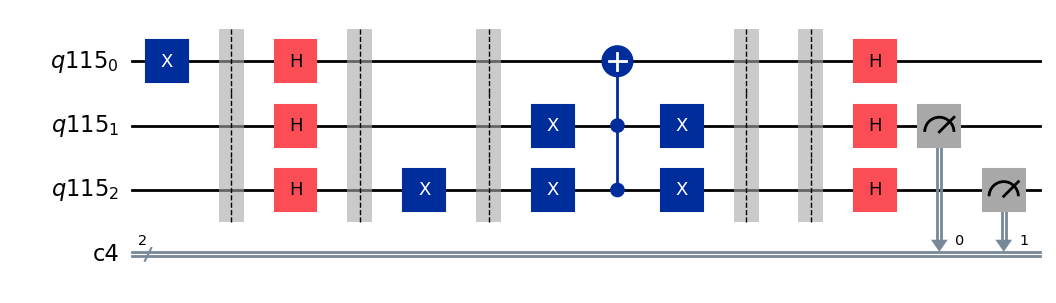

In [101]:
N = 2

q = QuantumRegister(N+1)
c = ClassicalRegister(N)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.barrier()
# setting output register to one
qc.h(q)

# a is a random array of 4 bits
qc.barrier()
qc.compose(Ug,qubits = range(0,len(q)), inplace = True)
qc.barrier()
qc.h(q)

qc.measure(q[1:],c)

qc.draw() 
qc.draw(output='mpl')

{'10': 258, '11': 240, '00': 261, '01': 265}


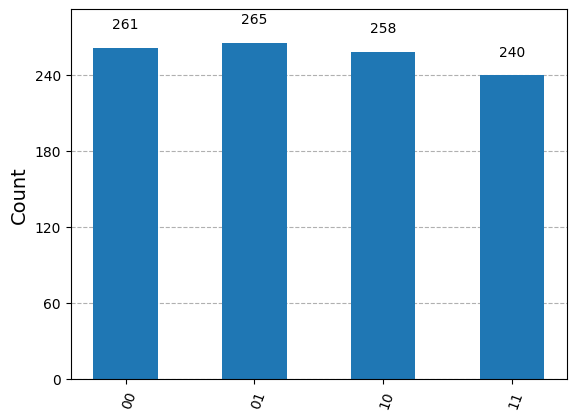

In [102]:
backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

job = backend.run(qc,shots=1024)
# default is 1024, but you can change it to preference
results = job.result()
counts = results.get_counts(qc)

#counts=backend.run(qc,shots=1024).result().get_counts(qc)

print(counts)   # Print the observed counts for each outcome.
plot_histogram(counts)  # Display a histogram of the results.

(c) What result is obtained upon measuring the input register, and what does it mean?

This algorithm tells us whether or not the function is constant or balenced. That is to say, it tells us if the function returns the same values always, or if it returns different values evenly. In this case, the function is balenced.

# Problem 4

Consider a classical Boolean function $f$ on $n$ bits defined by

$$f(x_0, \ldots, x_{n-1}) = \bigoplus_{i=0}^{n-1} \Bigl[ r_i (1-x_i) \oplus (1-r_i) x_i \Bigr] \; ,$$

where $\oplus$ is modulo-2 addition and $r_0, \ldots, r_{n-1}$ are $n$ classical bit values.

Design a quantum oracle $\mathbf{U}_f$ such that
$$\mathbf{U}_f \lvert x_{n-1} \ldots x_0\rangle \lvert y\rangle = \lvert x_{n-1} \ldots x_0\rangle \lvert y \oplus f(x_0, \ldots, x_{n-1})\rangle
$$

Implement your oracle as a function called "oracle" in the cell below.

In the cells below your answer we have included some functions to test your answer.

0
1
2
3
4


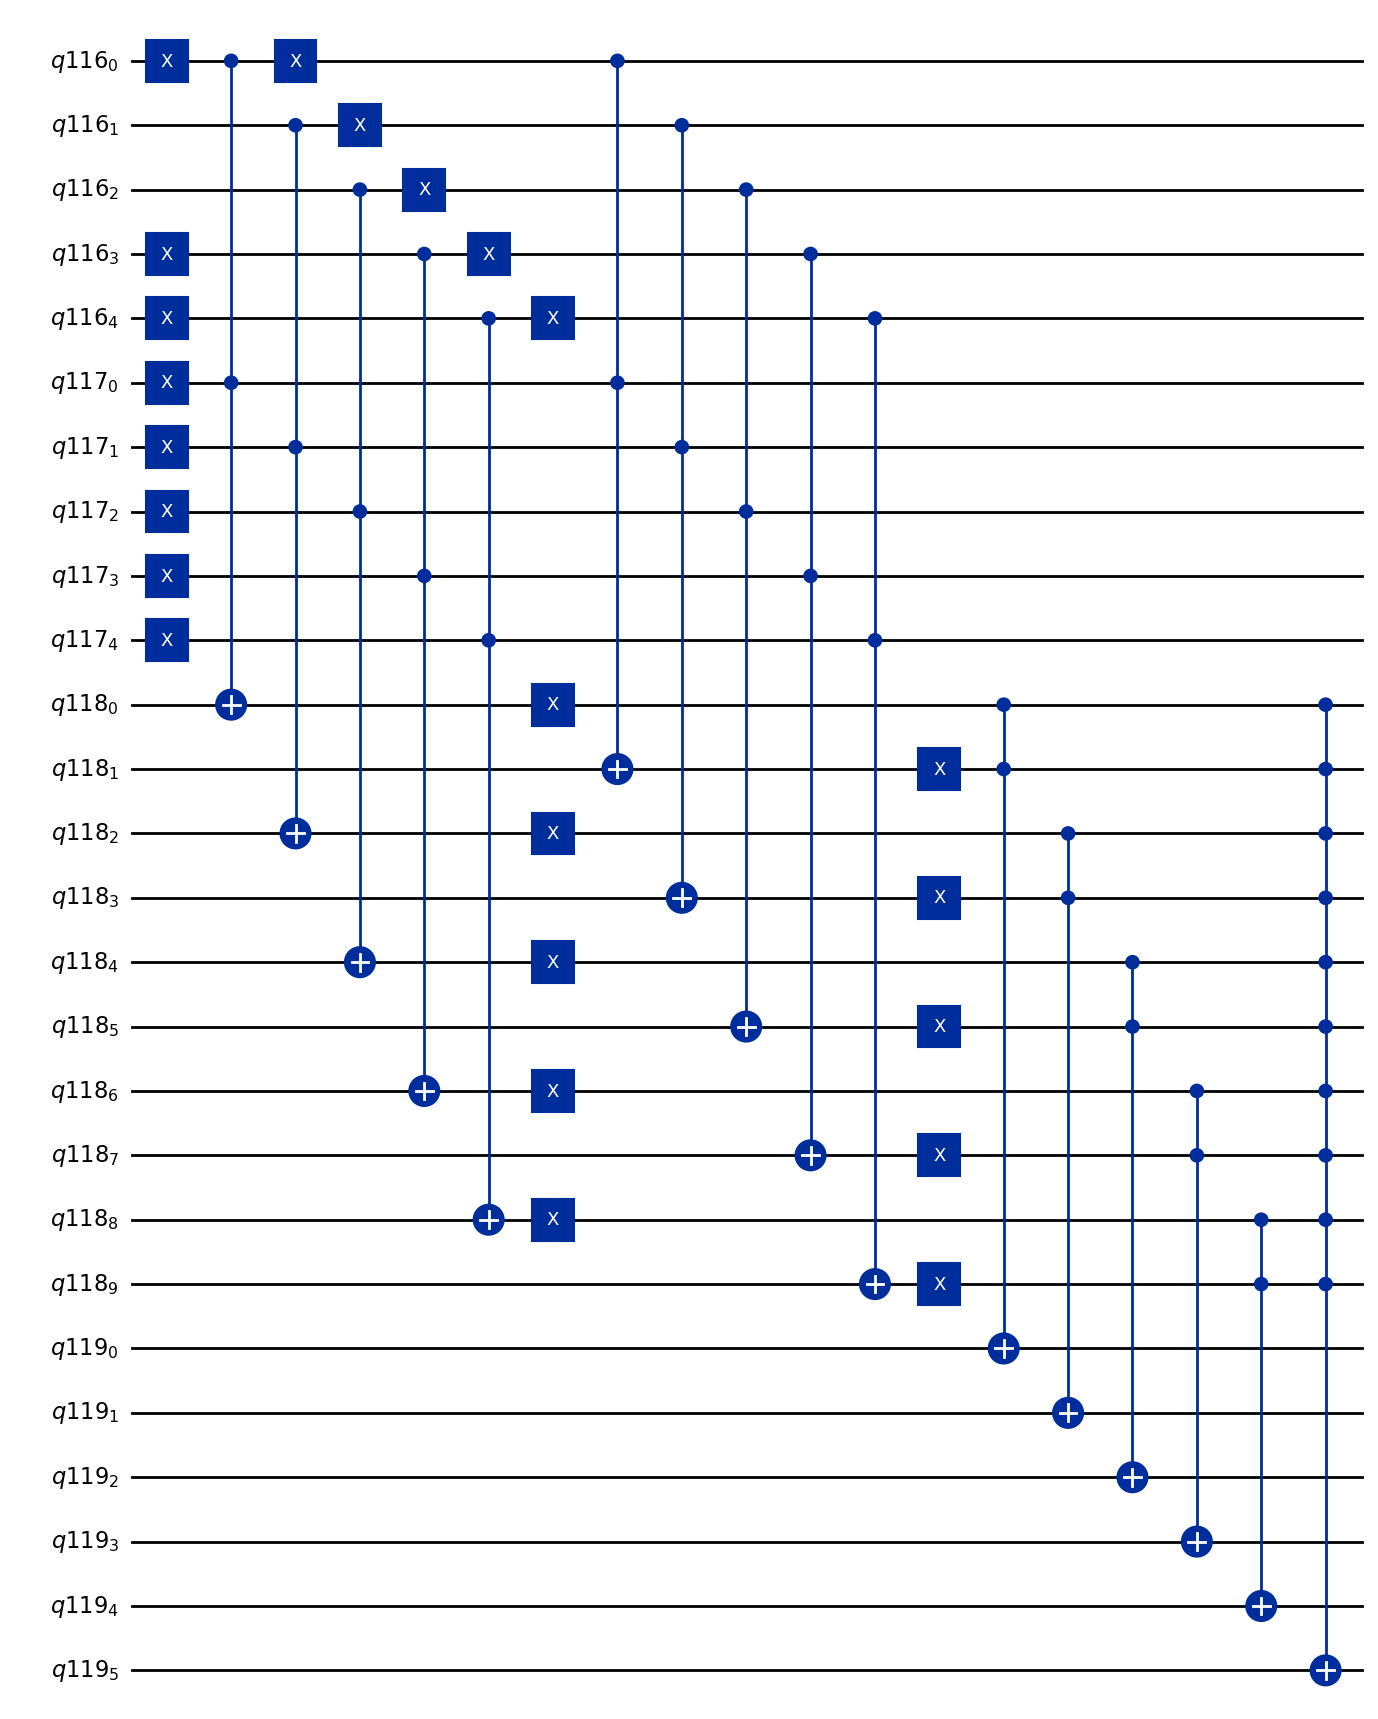

In [103]:
def oracleBaseFunc(r,qr,qx,qc):
    # First we want to make our classical register containing the state of r
    ancillaQubits = QuantumRegister(len(r)*2)
    outputRegister = QuantumRegister(len(r)+1)
    # We want to add the ancilla register, and output register to our quantum circuit
    qc.add_register(ancillaQubits)
    qc.add_register(outputRegister)
    # we need to add some ancilla Qubits to get work done
    for i in range(len(r)):
        if(r[i]==1):
            qc.x(qr[i])
        else:
            continue
    # This turns our classical information into something that can be engaged with quantumly.
    # After we make our ancilla register, we can start making moves. 

    # Multiply by r_i
    for i in range(len(qx)):
        
        qc.x(qx[i])
        qc.ccx(qx[i],qr[i],ancillaQubits[2*i])
        # Our ancilla register is going to alternate, the toffoli gate will correspond to our AND gate
        qc.x(qr[i])
        qc.ccx(qx[i],qr[i],ancillaQubits[2*i+1])
    # Now we need a way to XOR the ancilla qubits together, which is a NOT applied down the body of the toffoli gate
    for i in range(len(r)):
        print(i)
        qc.x([ancillaQubits[2*i],ancillaQubits[2*i+1]])
        qc.ccx(ancillaQubits[2*i],ancillaQubits[2*i+1],outputRegister[i])
    qc.mcx(ancillaQubits,outputRegister[len(r)])
    
    return qc,outputRegister

r = [1,0,0,1,1]
qr = QuantumRegister(len(r))
qx = QuantumRegister(len(r))
qc = QuantumCircuit(qr,qx)
oracleBaseFunc(r,qr,qx,qc)[0].draw('mpl')



0
1
2
3
[0, 1, 0, 0]


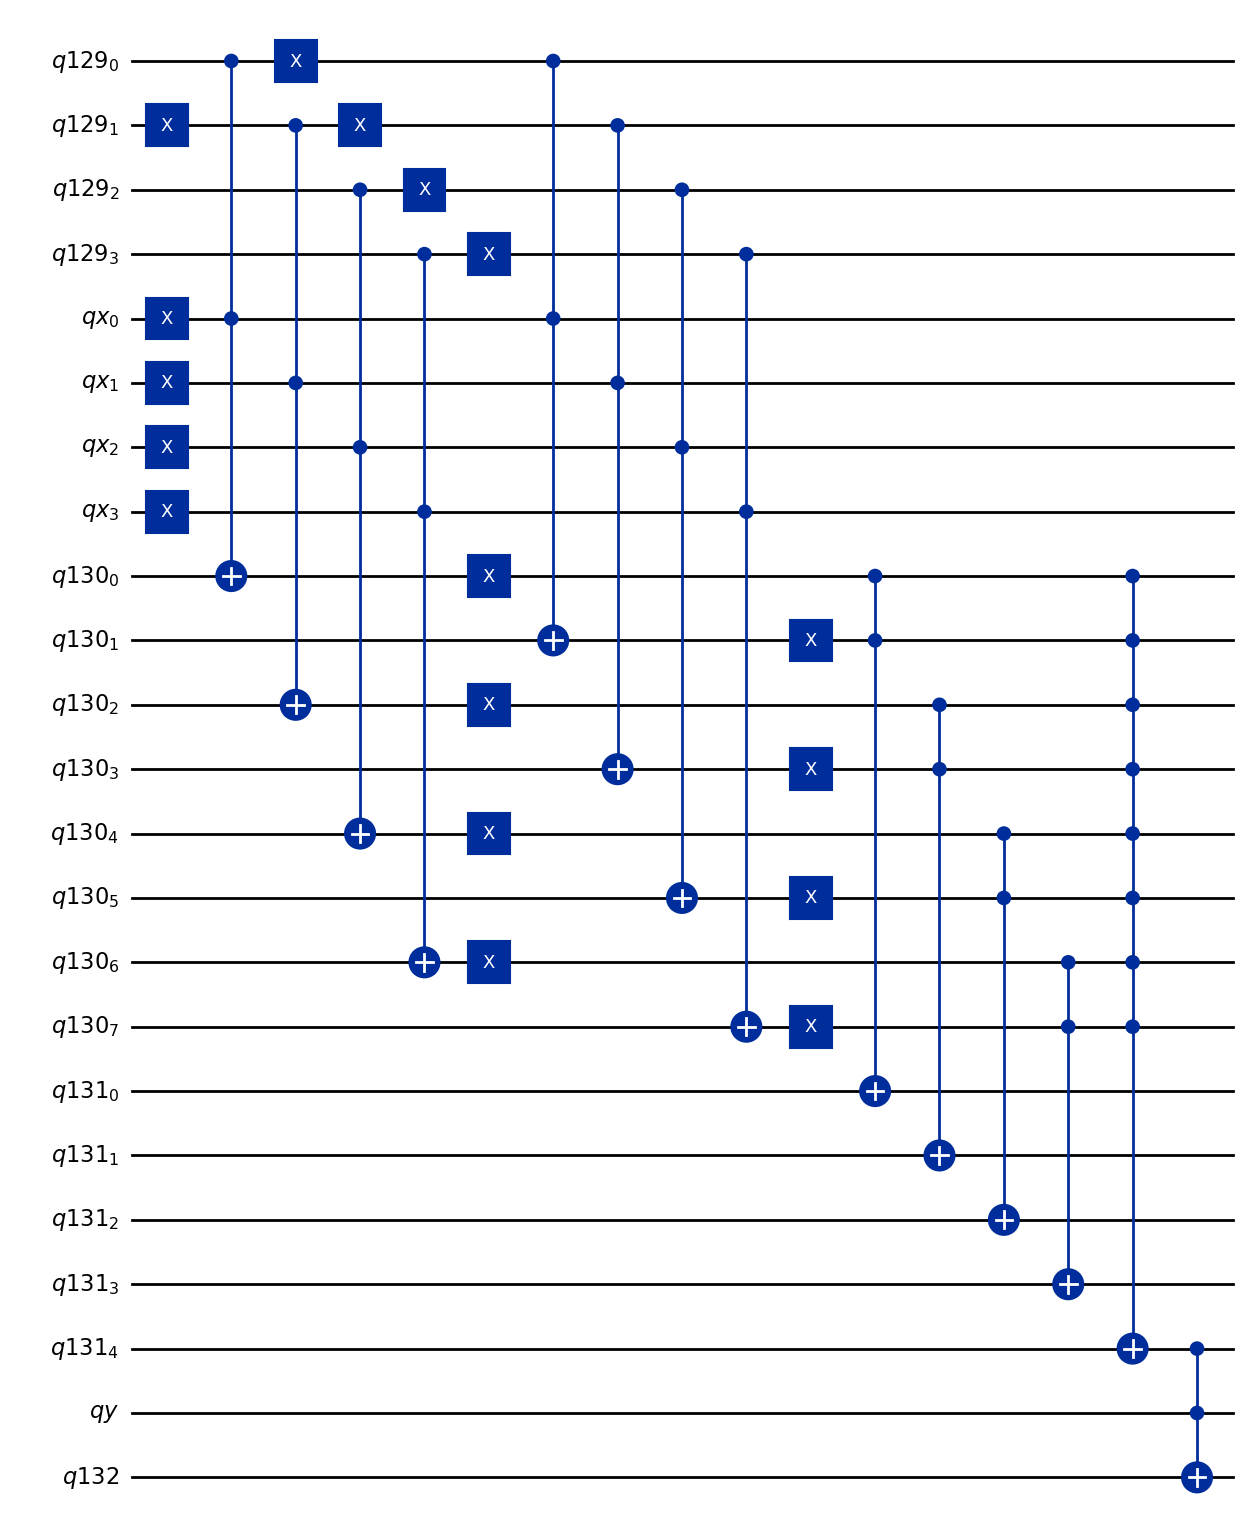

In [114]:
def oracle(qc, qx, qy, r):
    # qc is a quantum circuit consisting of two quantum registers: qx, qy
    # qx = [qx[0], ..., qx[n-1]] is a quantum register with n qubits
    # qy = qy[0] is a quantum register with one qubit
    # r = [r[0], ..., r[n-1]] is a classical register with n bits
    # ^This isnt the classical funciton we measure onto. Then the way to incorporate U, is going to be by 

    # Gameplan
    # 1. First we're going to code up the function f
    # 2. Then apply a Toffoli gate controlling on qc targetting qy

    qr = QuantumRegister(len(r))



    # Put your code
    qc,outputRegister = oracleBaseFunc(r,qr,qx,QuantumCircuit(qr,qx))
    qc.add_register(qy)
    finalQuantumRegister = QuantumRegister(1)
    qc.add_register(finalQuantumRegister)
    qc.ccx(qy,outputRegister[len(r)],finalQuantumRegister)


    # between these comments
    return qc


n=4
r = [1,0,0,1]
qx=QuantumRegister(n,name='qx')
qy=QuantumRegister(1,name='qy')
qc=QuantumCircuit(qx,qy)

r = list(np.random.choice([0,1], size=n))
qc = oracle(qc,qx,qy,r)

print(r)
qc.draw('mpl')

In [115]:
def makeIntegerCircuit(n, x, m=0, y=None, p=0, z=None, nocbits=False):

    # define base quantum and classical registers
    q = QuantumRegister(n+m+p)
    if nocbits:
        c = ClassicalRegister(1)
    else:
        c = ClassicalRegister(n+m+p)
    qc = QuantumCircuit(q, c)

    # turn base quantum registers into separate lists
    if (y is None) and (z is None):
        qx = [q[i] for i in range(n)]
    elif (z is None):
        qy = [q[i] for i in range(m)]
        qx = [q[i] for i in range(m,m+n)]
    else:
        qz = [q[i] for i in range(p)]
        qy = [q[i] for i in range(p,p+m)]
        qx = [q[i] for i in range(p+m,p+m+n)]

    # encode integers into quantum registers
    bits = np.binary_repr(x, width=n)
    for i in range(n):
        if bits[n-1-i] == '1':
            qc.x(qx[i])
    if y is not None:
        bits = np.binary_repr(y, width=m)
        for i in range(m):
            if bits[m-1-i] == '1':
                qc.x(qy[i])
    if z is not None:
        bits = np.binary_repr(z, width=p)
        for i in range(p):
            if bits[p-1-i] == '1':
                qc.x(qz[i])

    # return final circuit and registers
    if (y is None) and (z is None):
        return qc, c, qx
    elif (z is None):
        return qc, c, qx, qy
    else:
        return qc, c, qx, qy, qz

In [106]:
def measureCircuit(qc, c, qx, qy=None, qz=None):

    # determine number of qubits in each register
    n = len(qx)
    if qy is not None:
        m = len(qy)
    else:
        m = 0
    if qz is not None:
        p = len(qz)
    else:
        p = 0

    # apply measurement gates
    if (qy is None) and (qz is None):
        for i in range(n):
            qc.measure(qx[i], c[i])
    elif (qz is None):
        for j in range(m):
            qc.measure(qy[j], c[j])
        for i in range(n):
            qc.measure(qx[i], c[m+i])
    else:
        for k in range(p):
            qc.measure(qz[k], c[k])
        for j in range(m):
            qc.measure(qy[j], c[p+j])
        for i in range(n):
            qc.measure(qx[i], c[p+m+i])

    # execute quantum circuit
    backend = Aer.get_backend('qasm_simulator')
    job = backend.run(qc, shots=1024)
    result = job.result()
    data = result.get_counts(qc)

    # extract the integer values of the input register, x, and output register, y
    out = list(data.keys())[0]
    z = 0
    for k in range(p):
        if out[n+m+p-1-k] == '1':
            z += 2**k
    y = 0
    for j in range(p,p+m):
        if out[n+m+p-1-j] == '1':
            y += 2**(j-p)
    x = 0
    for i in range(p+m,p+m+n):
        if out[n+m+p-1-i] == '1':
            x += 2**(i-m-p)

    if (qy is None) and (qz is None):
        return x
    elif (qz is None):
        return x, y
    else:
        return x, y, z

In [107]:
def test(fun):
    K = 10 # number of trials
    result = 'Success!'
    for k in range(K):

        # choose random parameter values
        n = np.random.randint(1,5)
        r = [np.random.randint(0,2) for i in range(n)]
        x = np.random.randint(0,2**n)
        y = np.random.randint(0,2)

        # apply the algorithm
        qc, c, qx, qy = makeIntegerCircuit(n, x, 1, y)
        fun(qc, qx, qy, r)
        x_out, y_out = measureCircuit(qc, c, qx, qy)

        # compute the correct output
        for i in range(n):
            xi = x//2**i % 2
            y = ( y + ( r[i]*(1-xi) + (1-r[i])*xi ) % 2 ) % 2

        if not(x_out == x and y_out == y):
            result = 'Failure'
            break

    print(result)

In [108]:
# Run this cell to test your oracle.
test(oracle)

0
Failure


# Problem 5

Given the Boolean function $f(x_1, x_2) = x_1 \bar{x}_2 = x_1 (1-x_2)$,

(a) What are the solutions to the equation $f(x_1,x_2) = 1$?

x_2 = 0,x_1 = 1

(b) Define a function to implement the quantum oracle $\mathbf{U}_f$ such that $\mathbf{U}_f \lvert x_2 x_1\rangle\lvert x_0\rangle = \lvert x_2 x_1\rangle \lvert x_0  \oplus f(x_1,x_2)\rangle$.

In [109]:
N=2
R = int(np.floor(np.pi*np.sqrt(2**N)/4))

print(R)

1


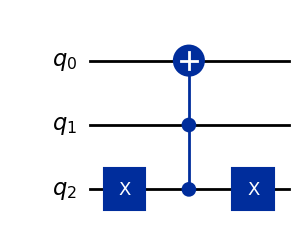

In [110]:
def U_f(qc):
    ## Put your code
    qc.x(2)
    qc.ccx(1,2,0)
    qc.x(2)

    ## between these comments
    return qc

U = QuantumCircuit(N+1)
U = U_f(U)
U.draw('mpl')

(c) How many oracle calls are needed to find the solution to $f(x_{1},x_{2})$ using $\mathbf{U}_{f}$ and Grover's algorithm?

In [111]:
W = QuantumCircuit(N+1)
W.h(W.qubits[1:])
W.x(W.qubits[1:])

W.h(W.qubits[0])
W.mcx(W.qubits[1:], W.qubits[0])
W.h(W.qubits[0])

W.x(W.qubits[1:])
W.h(W.qubits[1:])

(d) Implement Grover's algorithm for this oracle and use Qiskit to draw the circuit.

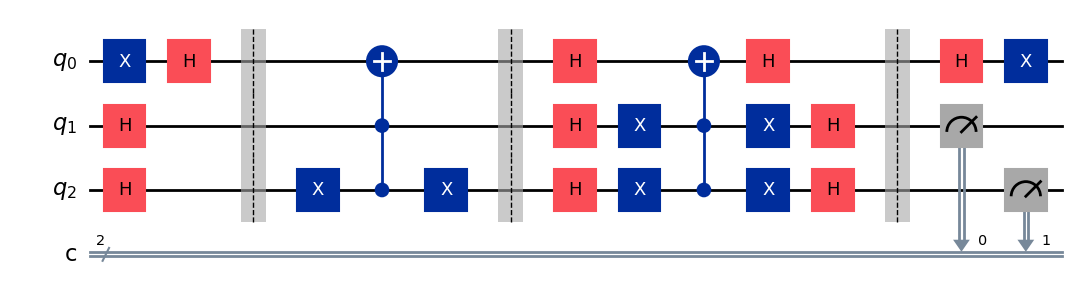

In [112]:
qc = QuantumCircuit(N+1,N)

qc.x(qc.qubits[0])
qc.h(qc.qubits)

for i in range(R):
    qc.barrier()
    qc.compose(U,qubits=range(N+1),inplace=True)
    qc.barrier()
    qc.compose(W,qubits=range(N+1),inplace=True)
    qc.barrier()
qc.h(qc.qubits[0])
qc.x(qc.qubits[0])
qc.measure(qc.qubits[1:],qc.clbits)

qc.draw('mpl')

{'00': 115, '10': 110, '11': 120, '01': 679}


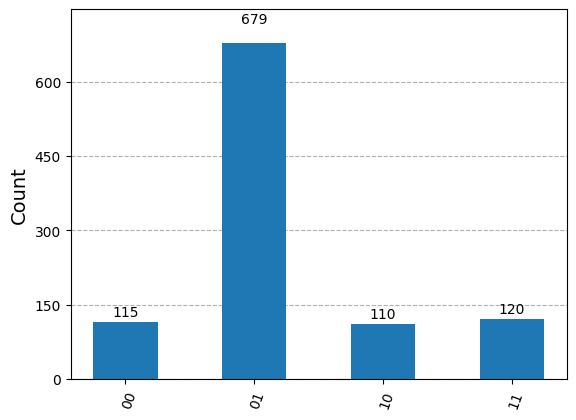

In [113]:
#Simulate your circuit!
backend = Aer.get_backend('qasm_simulator')
counts= backend.run(qc, shots=1024).result().get_counts(qc)
print(counts)
plot_histogram(counts)

Matrix([[alpha*exp(I)]])


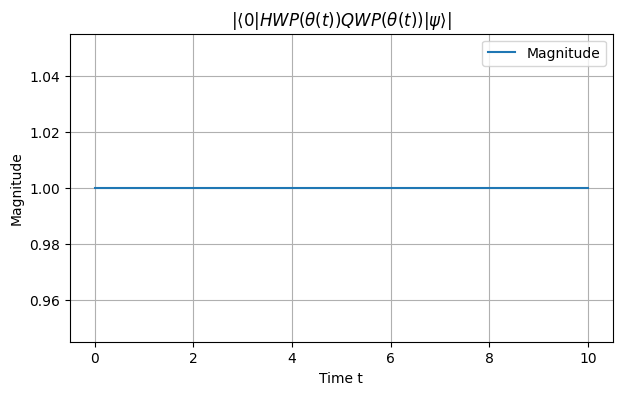

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
t, theta = sp.symbols('t theta')
alpha, beta = sp.symbols('alpha beta')

# Define HWP matrix
def squeeze(thetaT):
	J = sp.Matrix([
	[sp.exp(sp.I*thetaT),0],
	[0,sp.exp(-sp.I*thetaT)]
	]) 
	return J
    

def theta_t(t):
    return sp.sin(sp.pi * t / 2)  # basic periodic signal

# Define initial state |ψ⟩ = α|0⟩ + β|1⟩
psi = sp.Matrix([alpha, beta])

# Define measurement in zero basis ⟨0|
zero_basis = sp.Matrix([1, 0]).transpose()

print(zero_basis * squeeze(theta_t(1)) * psi)
def calculate_expression(t_val):
    theta_val = theta_t(t_val)
    result = zero_basis * squeeze(theta_val) * psi
    return result[0]  # Extract the scalar value

# Generate plot data
t_values = np.linspace(0, 10, 200)
expr_values = [calculate_expression(t_val).evalf(subs={alpha: 1/sp.sqrt(2), beta: sp.I/sp.sqrt(2)}) for t_val in t_values]
 # Above is where I'd change the input state, or in this case the state from the twister

# Calculate magnitudes
magnitudes = [abs(complex(val)) for val in expr_values]

# Plot the results
plt.figure(figsize=(7, 4))
plt.plot(t_values, magnitudes, label='Magnitude')
plt.xlabel('Time t')

plt.title(r'$|\langle 0 | HWP(\theta(t))QWP(\theta(t))|\psi \rangle|$')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

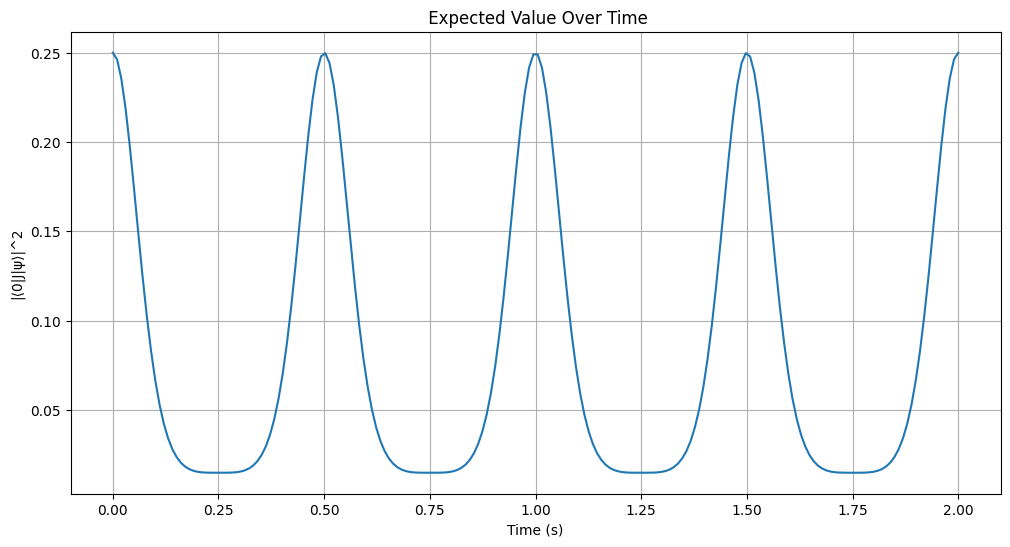

Initial state: [0.70710678 0.70710678]
Squeezer angle: 1.00 radians
Max magnitude: 0.2500
Min magnitude: 0.0148
[0.25      +0.j 0.24630773+0.j 0.23559265+0.j 0.21887932+0.j
 0.19768783+0.j 0.17379818+0.j 0.14899799+0.j 0.12486335+0.j
 0.10260878+0.j 0.08302119+0.j 0.06647215+0.j 0.0529874 +0.j
 0.04234621+0.j 0.0341845 +0.j 0.02808283+0.j 0.02362956+0.j
 0.02045781+0.j 0.01826046+0.j 0.01679021+0.j 0.01585173+0.j
 0.01529141+0.j 0.01498829+0.j 0.01484764+0.j 0.01479739+0.j
 0.01478679+0.j 0.01478626+0.j 0.0147877 +0.j 0.01480461+0.j
 0.01487188+0.j 0.01504555+0.j 0.01540314+0.j 0.01604552+0.j
 0.01710108+0.j 0.01873294+0.j 0.02114846+0.j 0.02460937+0.j
 0.0294382 +0.j 0.03601516+0.j 0.04475829+0.j 0.05608017+0.j
 0.07031811+0.j 0.08764114+0.j 0.1079457 +0.j 0.1307611 +0.j
 0.15519189+0.j 0.17992366+0.j 0.20331022+0.j 0.22354326+0.j
 0.23888385+0.j 0.24791553+0.j 0.24976743+0.j 0.2442577 +0.j
 0.23192409+0.j 0.21393422+0.j 0.1918968 +0.j 0.16761688+0.j
 0.1428475 +0.j 0.11908525+0.j 0.0

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def squeezer_matrix(phi, theta):
    """Generate the Jones matrix for a fiber optic squeezer."""
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    exp_i_phi = np.exp(1j * phi/2)
    exp_neg_i_phi = np.exp(-1j * phi/2)
    
    return np.array([
        [cos_theta**2 * exp_i_phi + sin_theta**2 * exp_neg_i_phi, 
         cos_theta * sin_theta * (exp_i_phi - exp_neg_i_phi)],
        [cos_theta * sin_theta * (exp_i_phi - exp_neg_i_phi), 
         sin_theta**2 * exp_i_phi + cos_theta**2 * exp_neg_i_phi]
    ])
# def squeezer_matrix(phi,theta):
#     return np.array([[np.exp(1j*phi),0],[0,np.exp(-1j*phi)]])
def unitary_Matrix():
    lam = 0
    theta = 0
    phi = 0
    U = np.array([
        [np.cos(theta),-np.exp(1j*lam)*np.sin(theta/2)],
        [np.exp(1j*phi)*np.sin(theta/2),np.exp(lam+phi)*np.cos(theta/2)]
    ])
    return U

def expected_value_H(psi, squeezer):
    """Calculate the complex inner product ⟨0|J|ψ⟩."""
    psi_out =np.dot(unitary_Matrix(),psi)
    psi_out = np.dot(squeezer,psi_out )
    
    H = np.array([[1], [0]])  # |0⟩ or |H⟩ state
    expecVal = np.real(np.dot(H.conj().T, psi_out))
    try:
        returnedVal = (np.dot(H.conj().T, psi_out)[0, 0])*np.conj(np.dot(H.conj().T, psi_out)[0, 0])

        # The issue came with not casting this to a real value
        # returnedVal = np.abs(psi_out[0])**2+np.abs(psi_out[1])**2
        return returnedVal**2
    except Exception as e:
        print(e)
        return (np.dot(H.conj().T, psi_out))[0]

def time_varying_expected_value(psi, theta, phi_func, t_range):
    """
    Calculate the complex expected value over time for a given initial state and time-dependent phase.
    
    :param psi: Initial state vector (2D complex numpy array)
    :param theta: Angle of the squeezer's fast axis with respect to horizontal
    :param phi_func: Function that takes time as input and returns the phase
    :param t_range: numpy array of time points
    :return: numpy array of complex expected values
    """
    expected_values = []
    for t in t_range:
        phi = phi_func(t)
        squeezer = squeezer_matrix(phi, theta)
        
        expected_values.append(expected_value_H(psi, squeezer))
    return np.array(expected_values)

# Example usage:
# Define an arbitrary initial state (normalized)
psi = np.array([[1], [1]])/np.sqrt(2) 

# Define the squeezer angle
theta = 1# 45 degrees

# Define a time-dependent phase function (e.g., sinusoidal)
def phi_func(t):
    return np.pi * np.sin(2 * np.pi * t)  # Full pi phase range, 1 Hz oscillation

# Create a time range
t_range = np.linspace(0, 2, 200)  # 2 seconds, 200 points

# Calculate the expected values
expected_values = time_varying_expected_value(psi, theta, phi_func, t_range)

# Calculate the complex magnitude
magnitudes = np.abs(expected_values)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t_range, magnitudes)
plt.title(" Expected Value Over Time")
plt.xlabel("Time (s)")
plt.ylabel("|⟨0|J|ψ⟩|^2")
plt.grid(True)
plt.show()

print(f"Initial state: {psi.flatten()}")
print(f"Squeezer angle: {theta:.2f} radians")
print(f"Max magnitude: {np.max(magnitudes):.4f}")
print(f"Min magnitude: {np.min(magnitudes):.4f}")
print(expected_values)

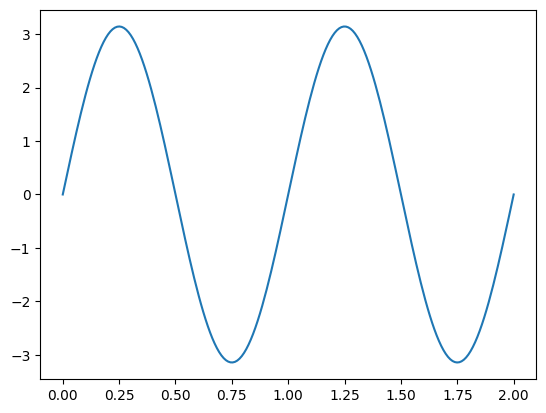

In [41]:
plt.plot(t_range,phi_func(t_range))

In [42]:
psiPrime = np.array([1,0])
# psiPrime= np.array([1,0])

H = np.array([1,0])

I= np.array([
    [1,0],
    [0,1]
])
expected_value_H(psiPrime, I)

0.9238795325112867

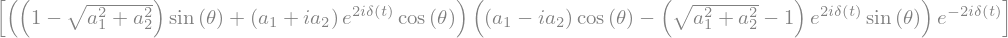

In [71]:
# Calculate the complex conjugate of the result
import sympy as sp

# Define symbols
theta = sp.symbols('theta',real = True)
delta = sp.Function('delta',real = True)(sp.symbols('t'))
alpha= sp.symbols('alpha')
beta = sp.symbols('beta',real = True)

# Define matrices from the image
M1 = sp.Matrix([[sp.cos(theta), sp.sin(theta)], [-sp.sin(theta), sp.cos(theta)]])
M2 = sp.Matrix([[sp.exp(sp.I * delta), 0], [0, sp.exp(-sp.I * delta)]])
vec = sp.Matrix([alpha, beta])
row_vec = sp.Matrix([[1, 0]])

# Multiply the matrices and vectors
result = row_vec * M1 * M2 * vec

a1,a2 = sp.symbols('a_1 a_2',real = True)
c = a1+sp.I*a2
result = result.subs({alpha:c,beta:(1-sp.sqrt(a1**2+a2**2))})
# Display the result in LaTeX form
latex_result = sp.latex(result)
latex_result

conjugate_result = sp.conjugate(result)

# Multiply the result by its complex conjugate
final_result = result * conjugate_result

# Display the final result in LaTeX form
latex_final_result = sp.latex(final_result)
latex_final_result
# Assume delta(t) is real valued, so the conjugate of delta(t) is delta(t) itself
delta_conj = delta

# Expand the product with the assumption that delta(t) is real
expanded_result = sp.simplify(result * conjugate_result.subs(sp.conjugate(delta), delta_conj))

# Display the expanded result in LaTeX form
sp.init_printing()
expanded_result


\left[\begin{matrix}a_{1}^{2} \sin^{2}{\left(\theta \right)} + a_{1}^{2} \cos^{2}{\left(\theta \right)} - a_{1} \sqrt{a_{1}^{2} + a_{2}^{2}} e^{2 i \delta{\left(t \right)}} \sin{\left(\theta \right)} \cos{\left(\theta \right)} - a_{1} \sqrt{a_{1}^{2} + a_{2}^{2}} e^{- 2 i \delta{\left(t \right)}} \sin{\left(\theta \right)} \cos{\left(\theta \right)} + a_{1} e^{2 i \delta{\left(t \right)}} \sin{\left(\theta \right)} \cos{\left(\theta \right)} + a_{1} e^{- 2 i \delta{\left(t \right)}} \sin{\left(\theta \right)} \cos{\left(\theta \right)} + a_{2}^{2} \sin^{2}{\left(\theta \right)} + a_{2}^{2} \cos^{2}{\left(\theta \right)} - i a_{2} \sqrt{a_{1}^{2} + a_{2}^{2}} e^{2 i \delta{\left(t \right)}} \sin{\left(\theta \right)} \cos{\left(\theta \right)} + i a_{2} \sqrt{a_{1}^{2} + a_{2}^{2}} e^{- 2 i \delta{\left(t \right)}} \sin{\left(\theta \right)} \cos{\left(\theta \right)} + i a_{2} e^{2 i \delta{\left(t \right)}} \sin{\left(\theta \right)} \cos{\left(\theta \right)} - i a_{2} e^{- 2 i \delt

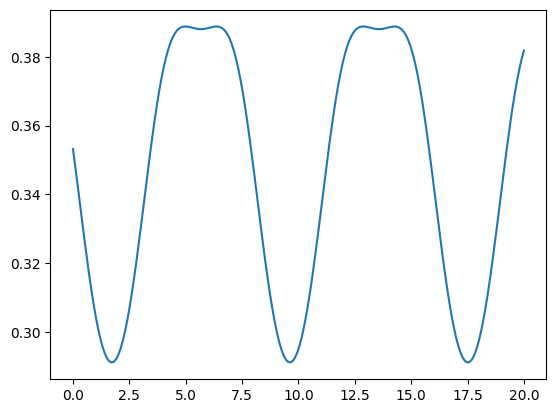

In [89]:
latex_expanded_result = sp.latex(expanded_result.expand())
print(latex_expanded_result)
def V(t):
    A = 1
    omega = 5/(2*np.pi)
    phi = .2
    return A* np.sin(omega*t+.2)

def delta(t):
    k = .4
    return k*(V(t))

def f(t,a1,a2,theta):
    alpha = a1+a2*1j

    beta = 1-np.sqrt(a1**2+a2**2)
    alphaTerm = (alpha*np.exp(1j*delta(t))*np.cos(theta))
    
    betaTerm = (beta*np.exp(-1j*delta(t))*np.sin(theta))
    expectedValue = alphaTerm+betaTerm
    # print(expectedValue)
    intensity = np.real(expectedValue*np.conjugate(expectedValue) )
    return intensity

t = np.linspace(0,20,200)
plt.plot(t,f(t,.5+.25j/np.sqrt(2),0,np.pi/16))